***
# <span style='color:Blue'> Recommend baseketball team using statistical analysis </span>

#### <span style='color:Blue'>Import the required packages</span>

In [1]:
import pandas as pd              # Perform operations on data frames
import numpy as np               # Perform numeric operations on data
import matplotlib.pyplot as plt  # For static visualizations
import seaborn as sns            # For advanced visualizations
import scipy.stats as stats      # To perform statistical operations
import datetime                  # To obtain and format date and time values
from scipy.stats import binom
# To support the backend renedering of figures
%matplotlib inline

***
# <span style='color:Blue'> Problem Statement</span>
***

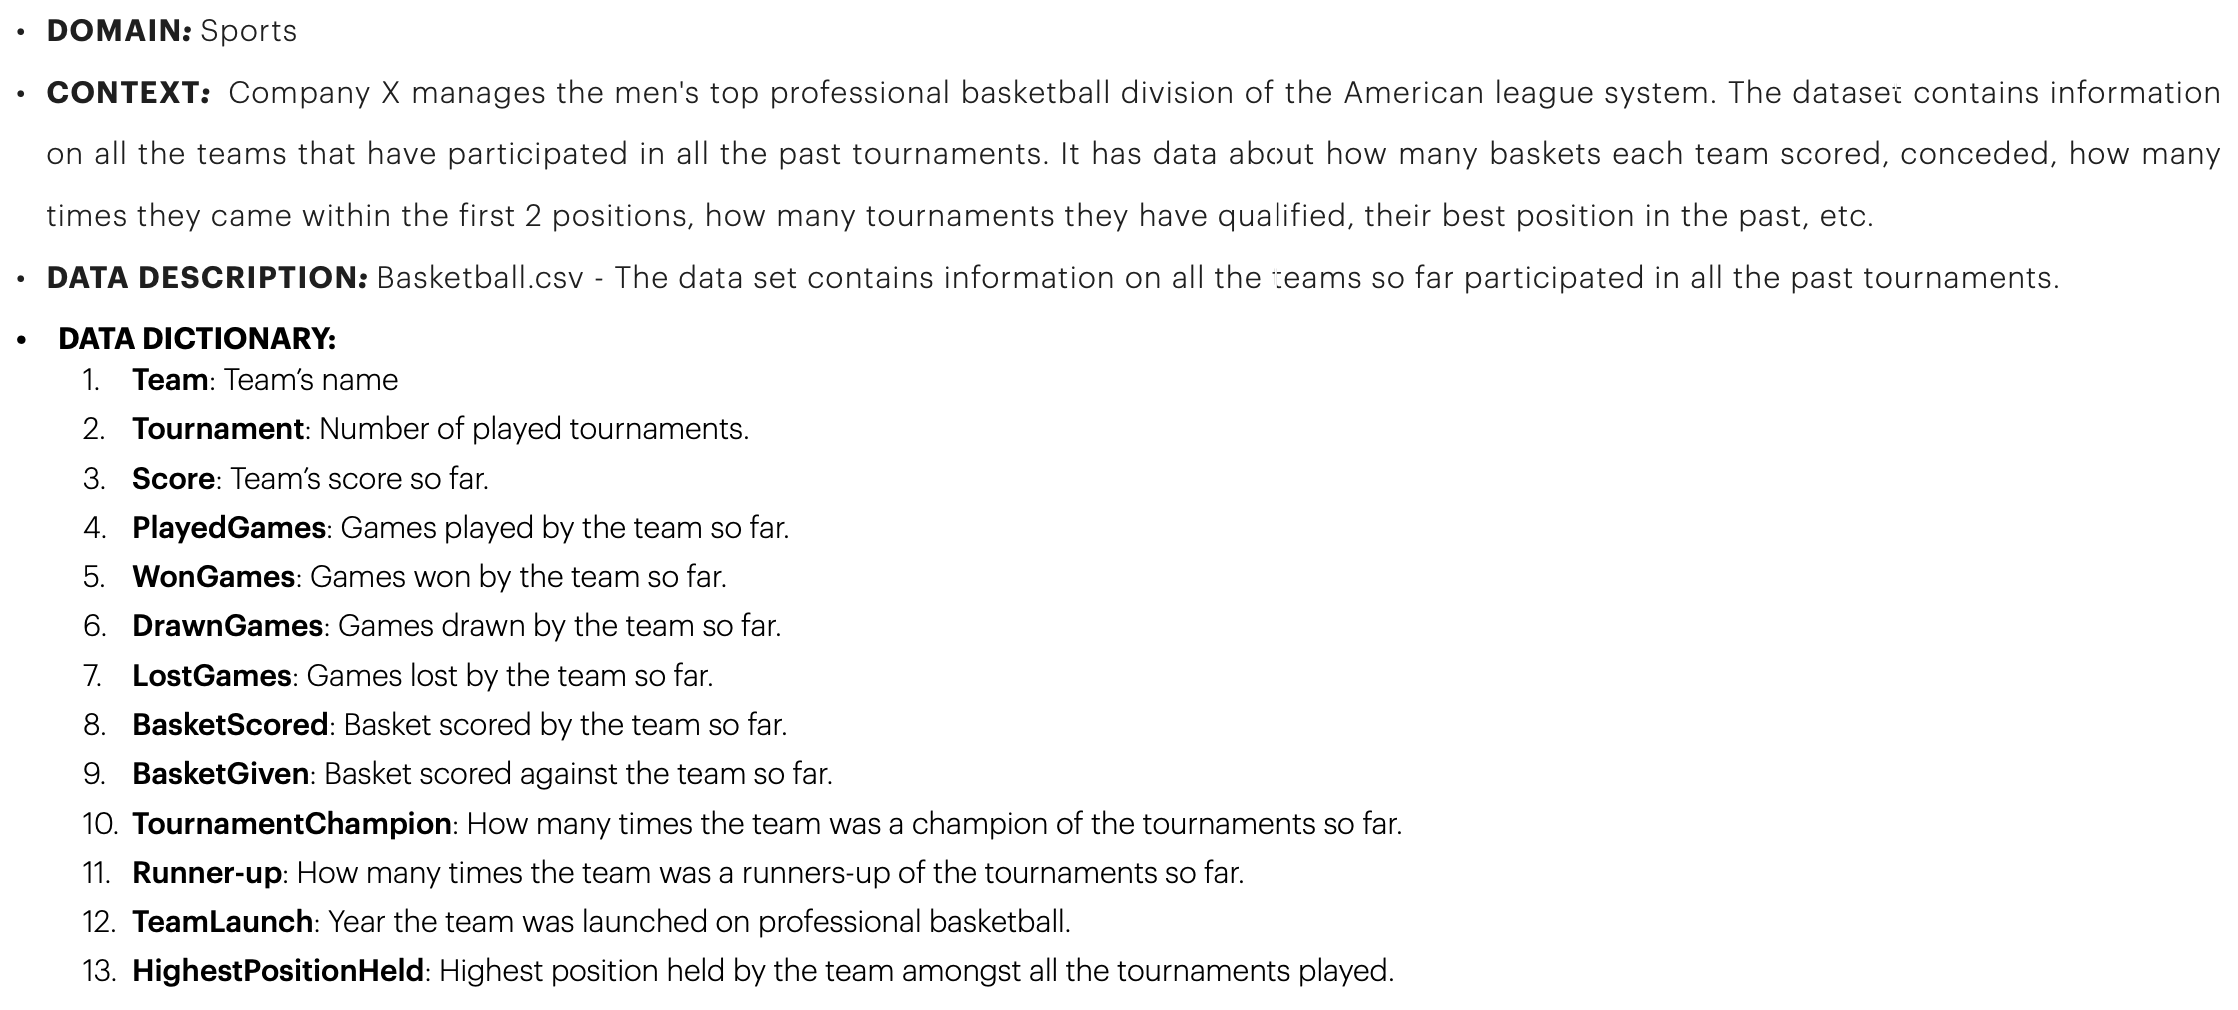

**PROJECT OBJECTIVE:** Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

**STEPS AND TASK [30 Marks]:**

## Import and pre-process the data

### Reading the data

In [19]:
#Read the .csv file
basketBall = pd.read_csv("Basketball.csv")

In [20]:
# head()gives the top 5 records
basketBall.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [21]:
#shape() provides the row and column count
initialDimensions = basketBall.shape
initialDimensions

(61, 13)

In [22]:
#info() provides more information about the rows and columns
basketBall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


**Observations**
- There are total of 61 rows and 13 columns.
- Tournament and HighestPositionHeld are of Integer type and rest other columns are of object type
- None of the observations have null values as per the above table

In [23]:
#Take a critical look of the data across rows and columns
basketBall

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


### Cleaning the data

**Observations**

Based on the output of `basketBall.info()` and `basketBall` we can observe the following things,
- Most of the columns should be of type integer they are displayed as of type object/string
- `basketBall.info()` shows all the columns have no empty/missing values, however it can be seen that column `TournamentChampion` and `Runner-up` columns have "-" characters for some of the rows indicating that those corresponding Teams did not win any Tournament championship or were never in runner-up positions respectively.

**Steps to be taken**
- Replace the character "-" with value 0 in these two columns

In [24]:
basketBall['TournamentChampion'].replace("-", 0, inplace=True)
basketBall['Runner-up'].replace("-", 0, inplace=True)

**Observations**
- Output of the `basketBall` also shows that some of the teams have "-" characters in most columns e.g. Team 61. 

**Steps to be taken**
- Find out count of "-" values per Team or row of the data frame

In [25]:
# A function to compute the number of dashes / missing values in a given series/list
def getCountOfCharacters(vals):
    count = 0
    for val in vals:
        if val == '-':
            count += 1
    return count

In [26]:
# Initialize a data frame to store per team or per row count of "-" values
rowMissing = pd.DataFrame({
    'Team': basketBall['Team'],
    '#Missing': np.nan
})

In [27]:
missingCounts = []
for i in basketBall.index:
    missingCounts.append(getCountOfCharacters(list(basketBall.iloc[i])))
rowMissing['#Missing'] = missingCounts

**Show Teams with "-" or missing values**

In [28]:
rowMissing.sort_values(by=['#Missing'], ascending=False, inplace=True)
rowMissing[rowMissing['#Missing'] > 0]

,Team,#Missing
60,Team 61,7


**Observation**
- It can be seen that only Team 61 has missing values in multiple columns i.e. 7.

**Check the columns of Team 61**

In [29]:
basketBall[basketBall['Team'] == 'Team 61']

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
60,Team 61,1,-,-,-,-,-,-,-,0,0,2017~18,9


**Steps to be taken**
- Remove Team 61 from the data frame as it has many missing records

In [30]:
basketBall.drop(60, axis=0, inplace=True)

**Confirm removal of the Team 61 by rechecking dimensions/shape and tail of the data frame**

In [31]:
# Initial shape/dimensions
initialDimensions

(61, 13)

In [32]:
# Current shape/dimensions
basketBall.shape

(60, 13)

In [33]:
basketBall.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
55,Team 56,1,35,38,8,11,19,36,55,0,0,2016_17,17
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955-56,15


**As done for the rows, check count of "-" value for every column**

In [34]:
# Initialize a data frame to store per team or per row count of "-" values
colMissing = pd.DataFrame({
    'Column': basketBall.columns,
    '#Missing': np.nan
})

In [35]:
missingCounts = []
for i in basketBall.columns:
    missingCounts.append(getCountOfCharacters(list(basketBall[i])))
colMissing['#Missing'] = missingCounts

**Show Columns with "-" or missing values**

In [36]:
colMissing.sort_values(by=['#Missing'], ascending=False, inplace=True, ignore_index=True)
colMissing

,Column,#Missing
0,Team,0
1,Tournament,0
2,Score,0
3,PlayedGames,0
4,WonGames,0
5,DrawnGames,0
6,LostGames,0
7,BasketScored,0
8,BasketGiven,0
9,TournamentChampion,0


**This confirms no more rows or columns have "-" or missing values**

**Take another look at unique values in the column `TeamLaunch`**

In [37]:
basketBall['TeamLaunch'].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56'], dtype=object)

**Observation**

- `TeamLaunch` column has inconsistent representation of the years. 
- Most of the years shown in pairs can be represented only using first four digits, without muchh impact on interpretation of their values

**Steps to be taken**
- Retain only first four charcters/digits of years in the `TeamLaunch` column

In [38]:
basketBall['TeamLaunch'] =  [x[:4] for x in basketBall['TeamLaunch']]

In [39]:
basketBall['TeamLaunch'].unique()

array(['1929', '1931', '1934', '1939', '1932', '1941', '1948', '1944',
       '1935', '1949', '1933', '1960', '1951', '1998', '1977', '1959',
       '2004', '1961', '1940', '1930', '1963', '1974', '1943', '1987',
       '1991', '2007', '1962', '1994', '1978', '1971', '1999', '2014',
       '1990', '1947', '1996', '1995', '1945', '1953', '1979', '1950',
       '2016', '2009', '1956', '1955'], dtype=object)

**Check again info about columns of the dataframe**

In [40]:
basketBall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   60 non-null     object
 10  Runner-up            60 non-null     object
 11  TeamLaunch           60 non-null     object
 12  HighestPositionHeld  60 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.2+ KB


**Observation**
- Though all the columns except `Team` supposed to be of integer type they are still in object or string type

**Steps to be taken**
- Convert columns to integer data type except for Team name. 

In [41]:
nonNumericCols = ['Team']

In [42]:
for col in basketBall.columns:
    if col not in nonNumericCols:
        basketBall[col] = basketBall[col].astype('int')
    else:
        basketBall[col] = basketBall[col].astype('str')

**Confirm the conversion of data types for the columns using info() function**

In [43]:
basketBall.dtypes

Team                   object
Tournament              int64
Score                   int64
PlayedGames             int64
WonGames                int64
DrawnGames              int64
LostGames               int64
BasketScored            int64
BasketGiven             int64
TournamentChampion      int64
Runner-up               int64
TeamLaunch              int64
HighestPositionHeld     int64
dtype: object

> **<span style='color:Blue'>Conclusion:</span>**

> All the operations performed above resulted into a clean data in expected format/type, making it ready for the exploratory data analysis

## Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques

**Basic statsitical summary of all the columns in the data frame**

In [44]:
#describe() provides the description of the data in the dataset
basketBall.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,1957.950000,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,26.646732,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,1934.750000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,1950.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,1977.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,2016.000000,20.000000


**Comments** :
The above table provides information about the following 
- Count (number of records)
- Central tendencies (Mean, 50% i.e. median)
- Dispersion related parameters (min, max, quartiles (25%, 50%, 75%), Standard deviation) 

### Understand the distributions of all the columns using histogram

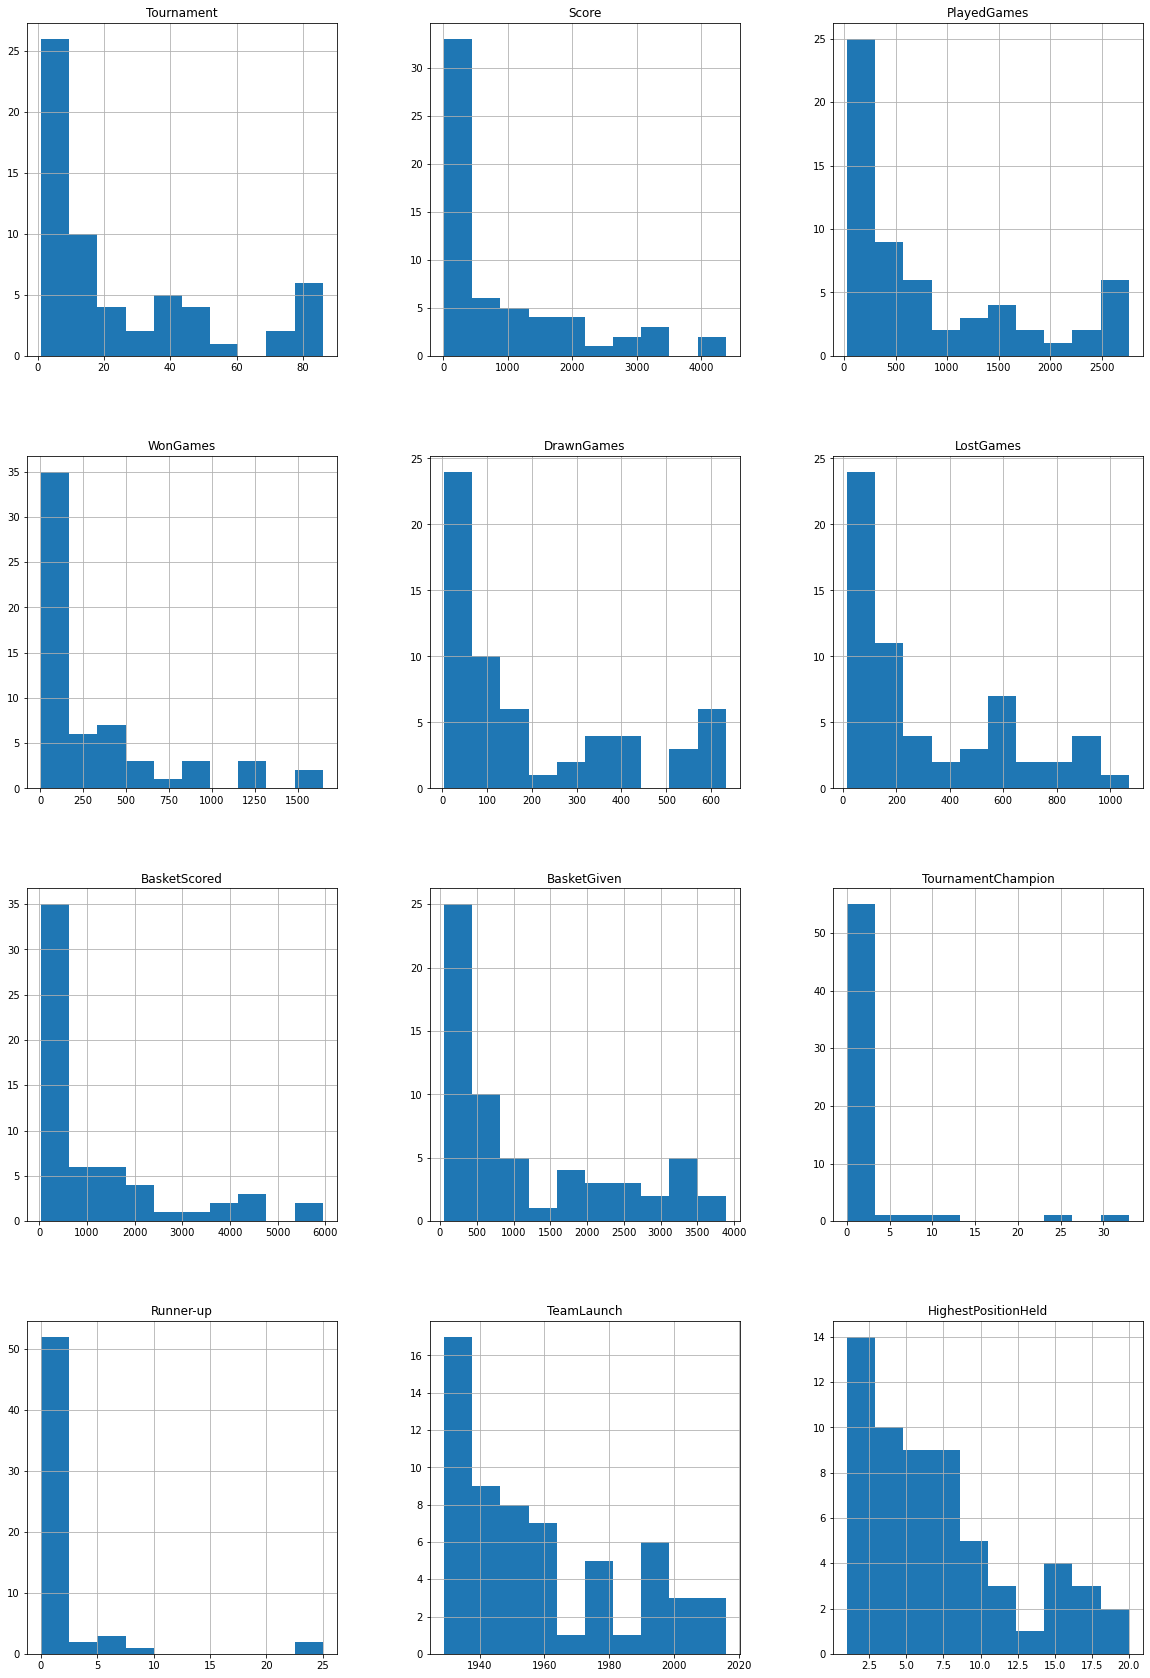

In [45]:
basketBall.hist(figsize=(20,30));

**Conclusion from the histograms**
- All the histograms show `right-skewed distritribution`. Most of the teams have their values of their corresponding variables concentrated in the lower quartile range. For example, if we consider scores of the team more than 75% of the team have score less than 2000. Similar interpretations can be made for the other variables.


### Compare the scores of all the teams

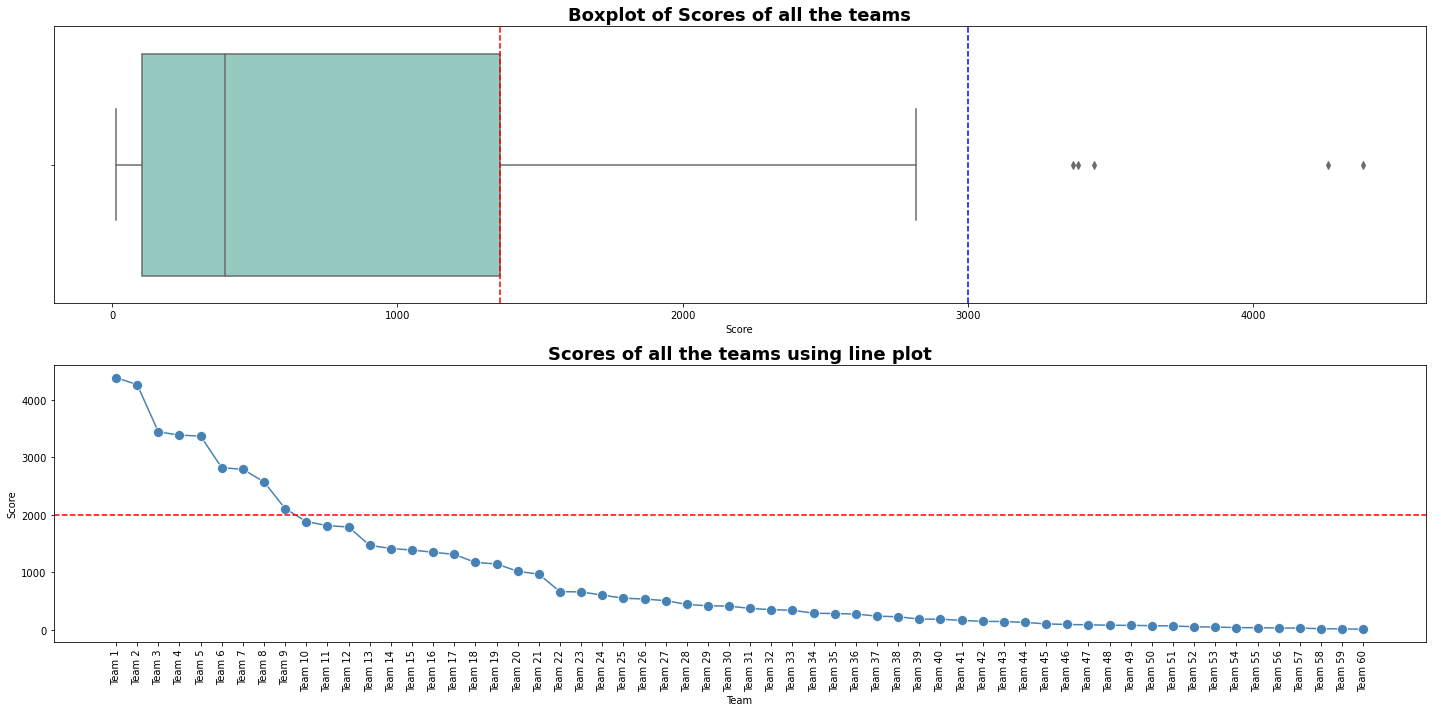

In [46]:
fig, ax =plt.subplots(2,1, figsize=(20,10))
sns.boxplot(x=basketBall['Score'], orient='h', palette="Set3", ax=ax[0])
ax[0].set_title("Boxplot of Scores of all the teams", fontweight="bold", fontsize = 18)
ax[0].axvline(x=1360, color='red', linestyle='--')
ax[0].axvline(x=3000, color='blue', linestyle='--')
sns.lineplot(data = basketBall, x='Team',y='Score', marker="o", markersize=10, color="steelblue", ax=ax[1])
ax[1].axhline(y=2000, color='red', linestyle='--')
ax[1].set_title("Scores of all the teams using line plot", fontweight="bold", fontsize = 18)
plt.xticks(rotation=90)
fig.tight_layout()
plt.show();

**Conclusion from the boxplot**
- More than 75% of the teams have score < 1360 (red vertical line)
- Outliers with score > 3000 are the top teams with high scores (blue vertical line)

In [47]:
basketBall[['Score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Score,60.0,916.45,1138.342899,14.0,104.25,395.5,1360.5,4385.0


**Conclusion from the line plot**
- Only 9 out of 60 teams have more than 2000 score (red horizontal line).
- Team1 and Team2 are the top teams with more than 4000 scores.

In [48]:
len(basketBall[basketBall['Score'] > 2000])

9

### Display top 25 scoring teams for better visualization

In [49]:
#Sort the Score in descending order and store in another dataframe to generate a barplot
scoredf = basketBall.sort_values(by=["Score"],ascending=False)
scoredf.reset_index(inplace=True, drop=True)

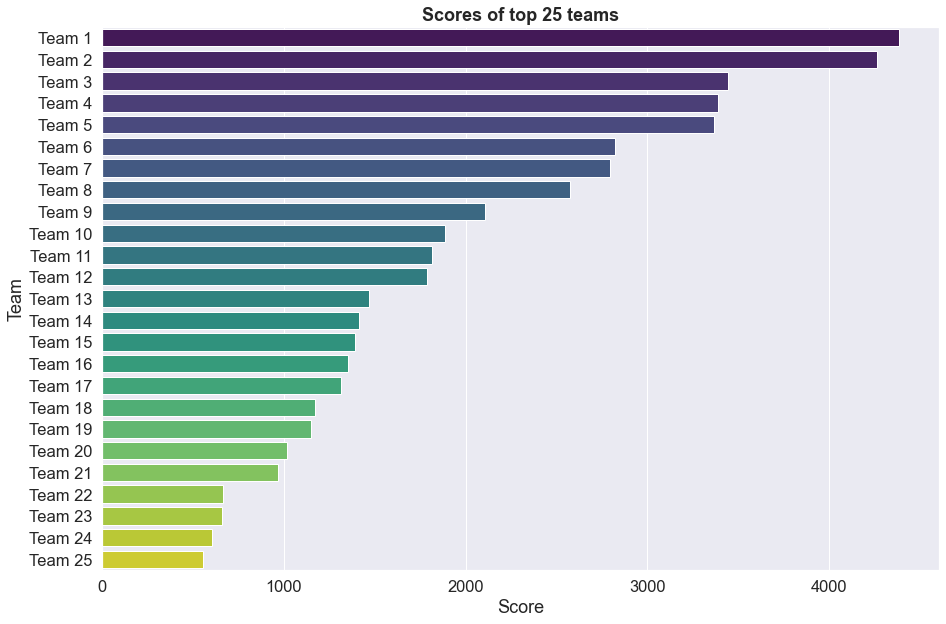

In [50]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,10))
sns.barplot(x='Score',y='Team', data=scoredf.head(25), color = 'lightblue', orient="h", palette="viridis")
#plt.xticks(rotation=90);
plt.title("Scores of top 25 teams", fontweight="bold");

### Creating Additional Features

**Comments**

Making interpretation of the data w.r.t. highly performing teams solely based on comparison of the absolute values of `WonGames, BasketScored, TournamentChampion` columns would not be fair.

For example, there might be some team teams with low number of `PlayedGames` however their rate or % of winning might be higher. 

To make the comparisons fair we need to generate columns with normalized % values

##### Create new columns representing % values as following

- %WonGames = (#WonGames / #PlayedGames)*100
- %LostGames = (#LostGames / #PlayedGames)*100
- %TournamentChampion = (#TournamentChampion / #Tournament)*100
- %BasketScored = (#BasketScored / (#BasketScored + #BasketGiven))*100

In [51]:
basketBall['%WonGames'] = (basketBall['WonGames'] / basketBall['PlayedGames'])*100
basketBall['%LostGames'] = (basketBall['LostGames'] / basketBall['PlayedGames'])*100
basketBall['%TournamentChampion'] = (basketBall['TournamentChampion'] / basketBall['Tournament'])*100
basketBall['%BasketScored'] = (basketBall['BasketScored'] / (basketBall['BasketScored'] + basketBall['BasketGiven']))*100

##### Calculating age of teams

It would interesting to see if there is any correlation of age or experience of team with its performance

In [52]:
# Calculate team Age

today = datetime.date.today()
basketBall['Age'] = today.year - basketBall['TeamLaunch']

##### Calculate average number of baskets scored per match

In [53]:
basketBall['BasketsPerGame'] = basketBall['BasketScored'] / basketBall['PlayedGames']

In [54]:
#Shape of the dataframe before and after addition of new features

print("Initial number of columns: ", initialDimensions)
print("Current number of columns: ", basketBall.shape)

Initial number of columns:  (61, 13)
Current number of columns:  (60, 19)


> **<span style='color:Blue'>Comment</span>**

Based on comparison with initial data, so far we have removed one team, and added six new columns or features to the data

### Teams with most/least number of games won or lost

- Considering only those teams who have won tournament at least once

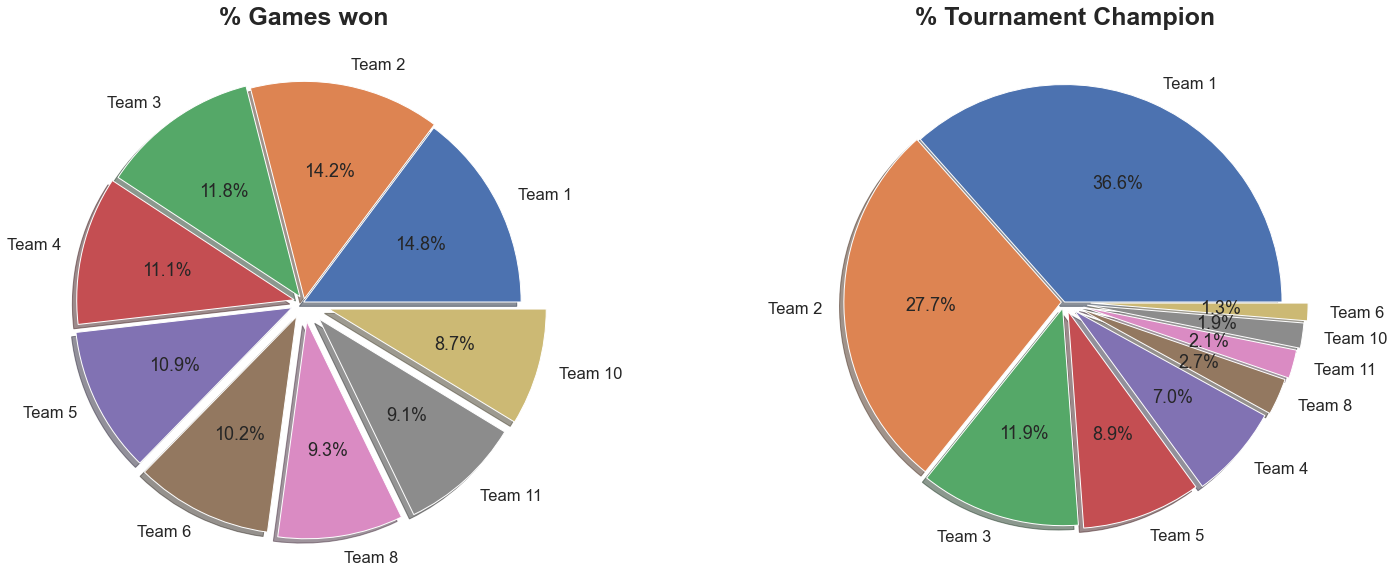

In [55]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)

# Only teams which won tournament championship at least once

# select data for %WonGames
bb = basketBall.loc[basketBall['TournamentChampion'] > 0, ['Team','%WonGames']].sort_values(by="%WonGames", ascending=False)
plot = plt.pie(bb['%WonGames'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15), 
               explode=[0.015*x for x in range(len(bb))], shadow = True, autopct='%.1f%%')
plt.title('% Games won', fontsize=25, fontweight="bold")
plt.subplot(1,2,2)

# select data for %TournamentChampion
bb = basketBall.loc[basketBall['TournamentChampion'] > 0,['Team','%TournamentChampion']].sort_values(by="%TournamentChampion", ascending=False)
plot = plt.pie(bb['%TournamentChampion'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20), 
               explode=[0.015*x for x in range(len(bb))], shadow = True, autopct='%.1f%%')
plt.title('% Tournament Champion', fontsize=25, fontweight="bold");

> **<span style='color:Blue'>Observations</span>**
- Among tournament winners, Team 1 has won most of the games, whereas Team 10 has won the least
- Among tournament winners, Team 1 has won most of the tournaments, whereas Team 6 has won the least
- In case of % Won games, 4 teams (Teams 1-4) have contributed to 50% of the area in pie chart, whereas in case of %TournamenChampion Team 1 and Team 2 have dominated the championships.

### Calculate correlation between different columns

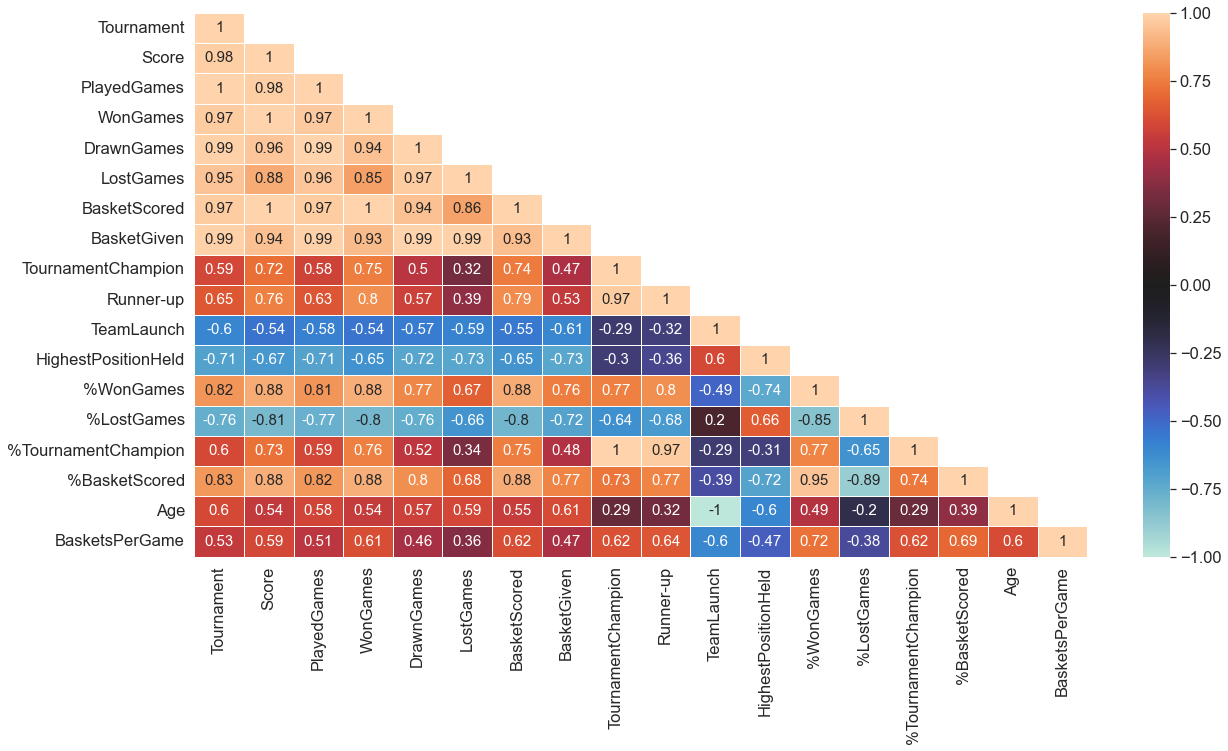

In [56]:
# Calculating correlation between all, existing and newly added features.

plt.figure(figsize=(20,10))
mask = np.zeros_like(basketBall.corr())
mask[np.triu_indices_from(mask, 1)] = True # To plot only lower triangular matrix of the plot
with sns.axes_style("white"):
    sns.heatmap(basketBall.corr(), annot=True, linewidths=.5, annot_kws={'size': 15}, center = 0,  mask=mask)
plt.show()

> **<span style='color:Blue'>Conclusions from the Heatmap</span>**

- The correlation values of **Age Vs most of the other columns (except TeamLaunch and HighesrPositionHeld) are positively correlated**. 

    It means age of the team has positive impact on its performance as experience helps in devising better game plans and winning strategies

- Addition of new feature columns reflects changes in the correlation values from their corresponding original feature column.

    For example, Age Vs WonGames have a correlation of 0.54 where as Age Vs %WonGames have a correlation of 0.49.
    
    Much the same Age Vs BasketScored have a correlation of 0.55 where as Age Vs %BasketScored have a correlation of 0.39.
    
    Thus, it shows that using raw values might have resulted in wrong interpretations for few variables

### Identify the  teams based on the HighestPositionHeld (i.e 1,2) basically the Winner and Runner-up

In [57]:
top_teams = basketBall[basketBall['HighestPositionHeld']<3]

In [58]:
top_teams.shape

(14, 19)

#### Restructuring data for top teams to compare their %WonGames and %TournamentChampion using side by side barplots

In [59]:
df1 = top_teams[['%WonGames', 'Team']].copy()
df1['Category'] = '%WonGames'
df1.rename(columns = {'%WonGames':'Percentage'}, inplace = True)
df1.sort_values(by ='Percentage', ascending=False, inplace=True)

In [60]:
df2 = top_teams[['%TournamentChampion','Team']].copy()
df2['Category'] = '%TournamentChampion'
df2.rename(columns = {'%TournamentChampion':'Percentage'}, inplace = True)

In [61]:
df3 = top_teams[['%BasketScored','Team']].copy()
df3['Category'] = '%BasketScored'
df3.rename(columns = {'%BasketScored':'Percentage'}, inplace = True)

In [62]:
bardf = pd.concat([df1, df2], axis=0)

In [63]:
bardf.head()

,Percentage,Team,Category
0,59.630702,Team 1,%WonGames
1,57.241130,Team 2,%WonGames
2,47.475134,Team 3,%WonGames
3,44.557057,Team 4,%WonGames
4,43.772629,Team 5,%WonGames


### Generate a barplot for the above top Teams with their %WonGames

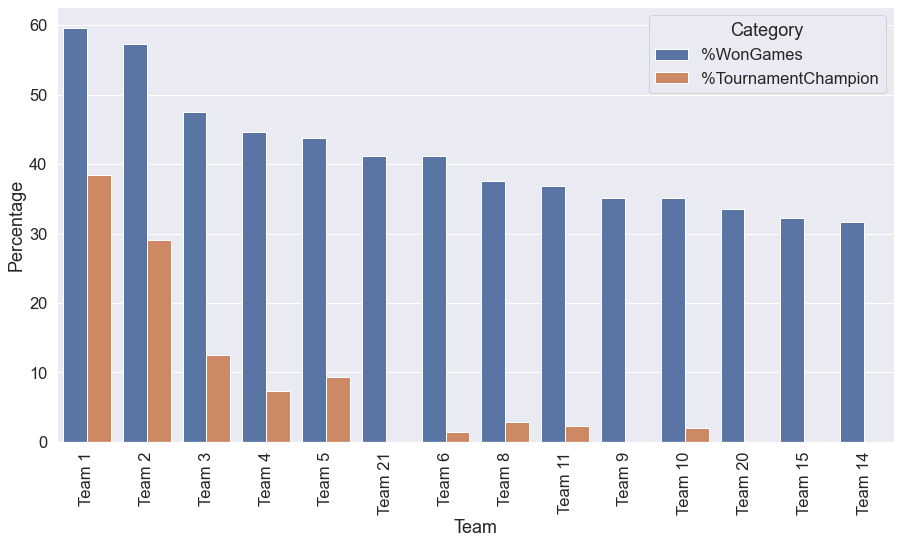

In [64]:
# Side by side barplot for finalist teams

plt.figure(figsize=(15,8))
sns.barplot(data = bardf, x='Team', y='Percentage', hue ='Category')
plt.xticks(rotation=90)
plt.show()

> **<span style='color:Blue'>Conclusions from the side by side barplot</span>**

- Overlall, Teams with higher %WonGames have higher rate of %TournamentChampions. 
- However, Team 5 has slightly better %TournamentChampions though it has relatively less %WonGames compared to Team 4
- Team 21 has relatively higher %WonGames than Teams 8, 11 and 10 however it has not won the championship so far.

### Pairwise scatter plots for finalist teams with selected features

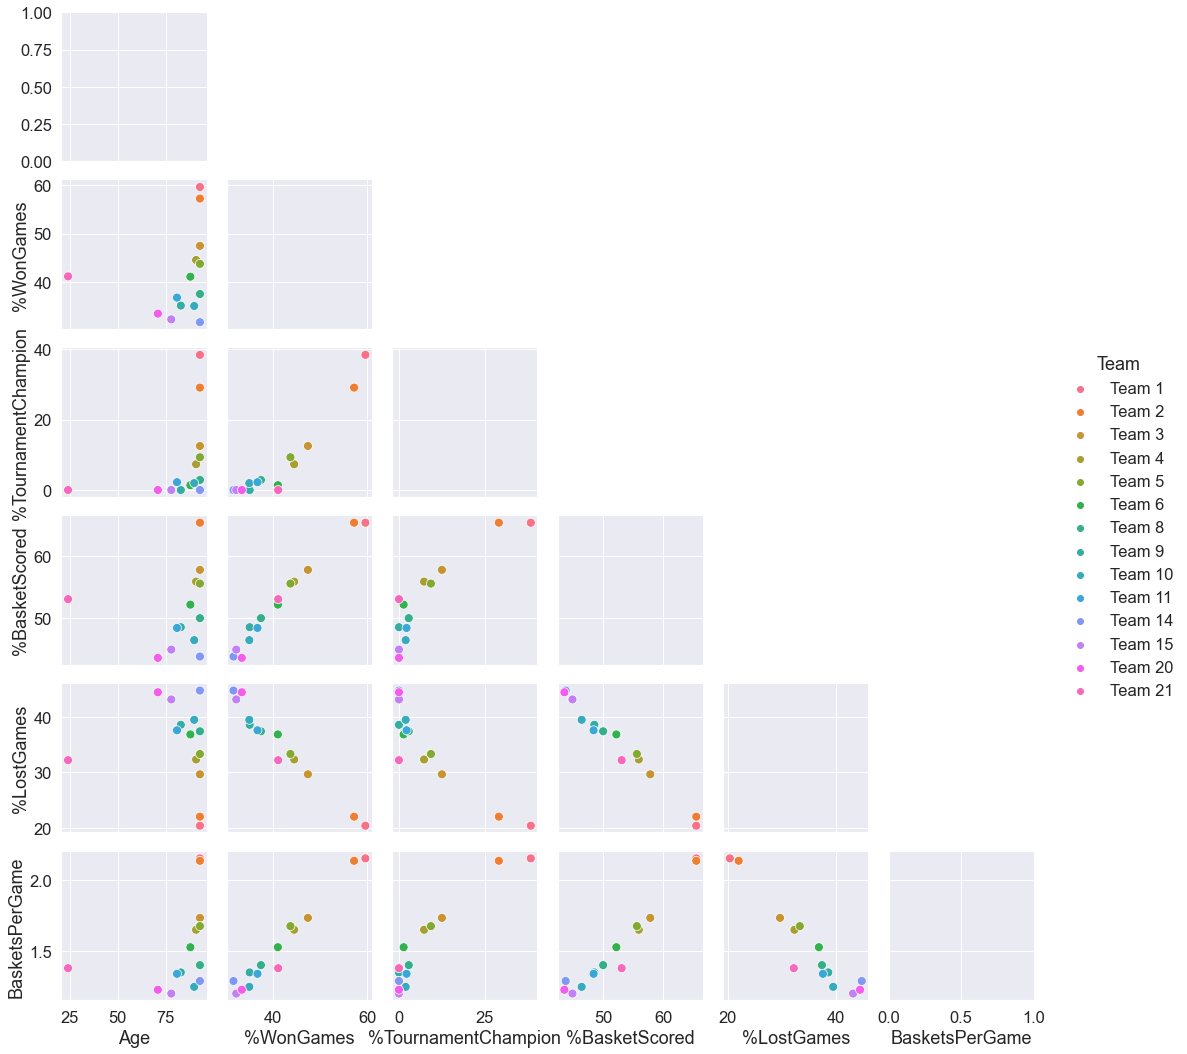

In [65]:
sns.pairplot(top_teams[['Age','%WonGames','%TournamentChampion','%BasketScored', '%LostGames', 'BasketsPerGame','Team']], 
             hue='Team', corner=True, diag_kind = 'None', plot_kws={"s": 80});

> **<span style='color:Blue'>Conclusions from the pairwise scatter plots</span>**

- Overlall, Scatter plots show that correlation among the provided variables/features.
- Following pairs of features are highly positively correlated
    - %WonGames Vs BasketsPerGame
    - %WonGames Vs %BasketsScored
    - %WonGames Vs %TournamentChampion
    - %BasketsScored Vs BasketsPerGame

- Following pairs of features are highly negatively correlated
    - %LostGames Vs %BasketsScored
    - %LostGames Vs BasketsPerGame
    - %WonGames Vs %LostGames

> **<span style='color:Blue'>One striking observation</span>**

- Team 21, being the youngest among top 25 teams based on Age, has impressively higher %WonGames. 
- Thus, we can say that Team 21 has higher chances of emerging as a champion in near future

**Visulization of scatter plot for Age Vs %WonGames to highlight performance of this young Team 21**

In [66]:
# Collecting values for Team 21
team21 = top_teams[top_teams['Team'] == 'Team 21'].reset_index(drop=True)

In [67]:
team21[['Team','Age', '%WonGames', '%BasketScored','%TournamentChampion']]

,Team,Age,%WonGames,%BasketScored,%TournamentChampion
0,Team 21,24,41.176471,53.063653,0.0


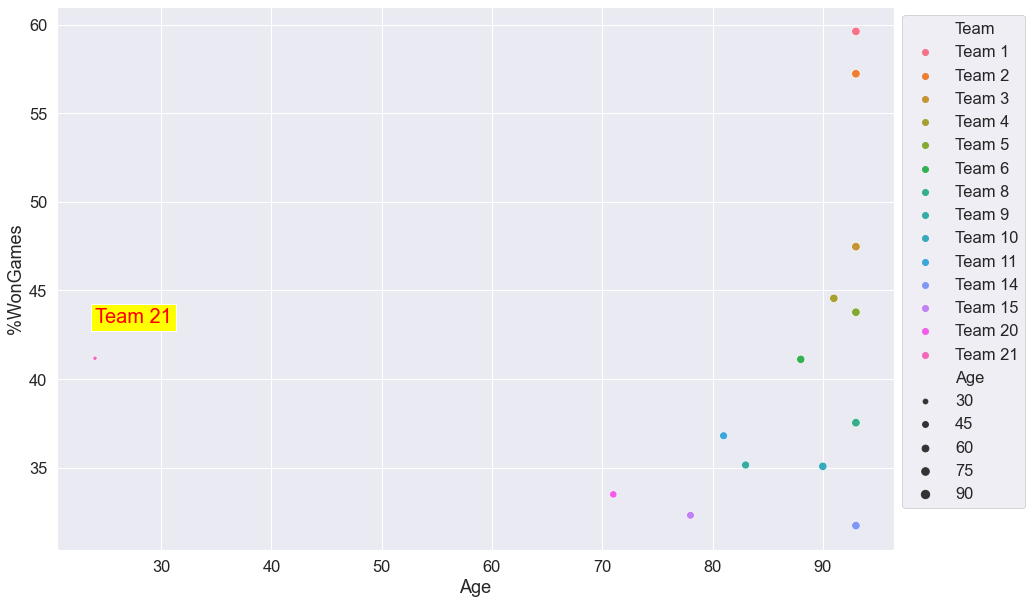

In [68]:
plt.figure(figsize=(15,10))
g = sns.scatterplot(data=top_teams, x='Age', y='%WonGames', hue='Team', size='Age');
g.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1);
plt.text(x=team21['Age'][0], # Getting age of team 21
         y=team21['%WonGames'][0] + 2, # Adjusting position of the text for team name
         s = team21['Team'][0],
         fontdict=dict(color='red',size=20),
         bbox=dict(facecolor='yellow'));

### Checking the scatter and distribution of Age of all the teams

> **<span style='color:blue'>Comment</span>**

Like Team 21, there might be few more new teams (based on Team age) with higher %WonGames.

So it will be worth to explore Teams in different age groups.

### Jointplot of Age and %WonGames for all the teams

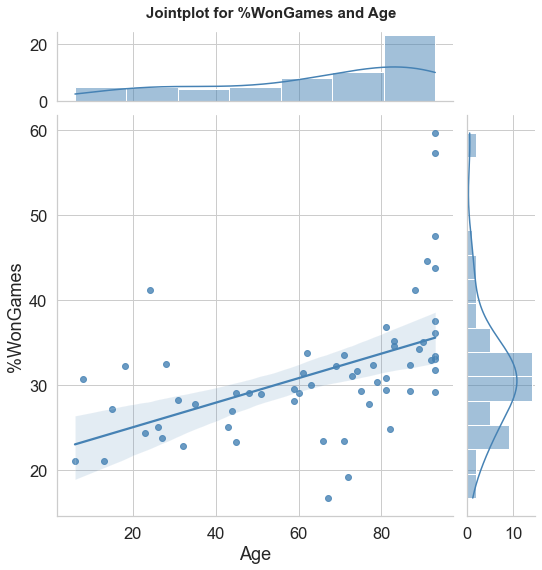

In [69]:
sns.set_style("whitegrid")
sns.jointplot(data=basketBall, x='Age', y='%WonGames', kind="reg", color = "steelblue",
              marginal_ticks=True, height=8)
plt.suptitle("Jointplot for %WonGames and Age", fontweight="bold", y = 1, fontsize=15);

> **<span style='color:blue'>Observation</span>**

- As observed in previous heatmap of correlation between different variables, Age has positive correlation with %WonGames.
- We can also observe that some of the younger teams (Age < 60) have higher %WonGames

**Statistical summary of Age and %WonGames**

In [70]:
basketBall[['Age', '%WonGames']].describe()

,Age,%WonGames
count,60.000000,60.000000
mean,64.050000,31.364790
std,26.646732,7.831199
min,6.000000,16.666667
25%,44.750000,27.607494
50%,71.500000,30.491722
75%,87.250000,33.540164
max,93.000000,59.630702


> **<span style='color:blue'>Comment</span>**
- We have roughly 50% of the team with age below 70, with minimum age of 6 and maximum age of 93, highlighting high dispersion in the ages.

### Create age groups, New and Old, based on Age cut-off of 70 (close to median of age)

In [71]:
basketBall['AgeGroup'] = ""
basketBall.loc[basketBall['Age'] >= 70, 'AgeGroup'] = 'Old'
basketBall.loc[basketBall['Age'] < 70, 'AgeGroup'] = 'New'

### Compare performance of teams between age groups

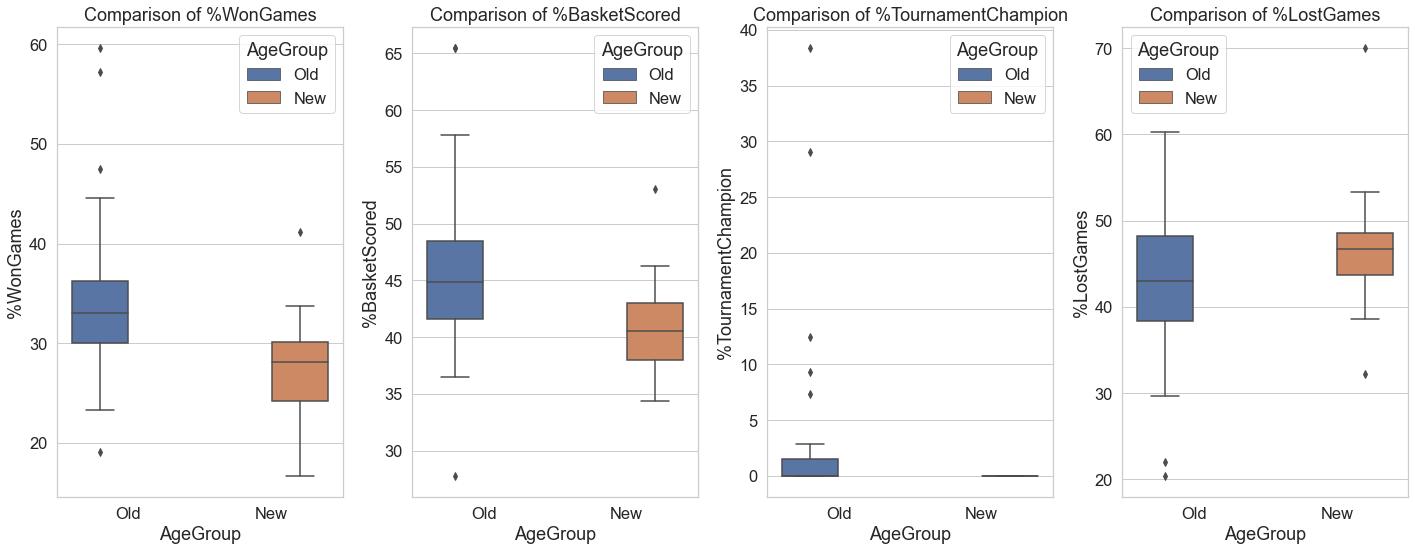

In [72]:
fig, ax = plt.subplots(1,4, figsize=(20,8))
sns.boxplot(data=basketBall, x='AgeGroup', y='%WonGames', orient='v',hue='AgeGroup', ax=ax[0])
ax[0].title.set_text("Comparison of %WonGames")
sns.boxplot(data=basketBall, x='AgeGroup', y='%BasketScored', orient='v',hue='AgeGroup', ax=ax[1])
ax[1].title.set_text("Comparison of %BasketScored")
sns.boxplot(data=basketBall, x='AgeGroup', y='%TournamentChampion', orient='v',hue='AgeGroup', ax=ax[2])
ax[2].title.set_text("Comparison of %TournamentChampion")
sns.boxplot(data=basketBall, x='AgeGroup', y='%LostGames', orient='v',hue='AgeGroup', ax=ax[3])
ax[3].title.set_text("Comparison of %LostGames")
fig.tight_layout();

> **<span style='color:blue'>Comment</span>**
- Based on observation of the boxplots, Old Teams have higher %WonGames, %BasketScored
- Old teams ahve lower %LostGames compared to new teams
- New teams have not won Tournament championships so far

#### Sort and compare teams in respective age groups based on selected features

In [73]:
# Create separate data frames for new and old teams 
youngTeams = basketBall.loc[basketBall['AgeGroup'] == 'New',['%WonGames','%TournamentChampion','%BasketScored', 'Team']]
youngTeams.sort_values(by='%WonGames', ascending=False, inplace=True)
youngTeams.reset_index(drop=True, inplace=True)

oldTeams = basketBall.loc[basketBall['AgeGroup'] == 'Old',['%WonGames','%TournamentChampion','%BasketScored', 'Team']]
oldTeams.sort_values(by='%WonGames', ascending=False, inplace=True)
oldTeams.reset_index(drop=True, inplace=True)

**Heatmap of performance of teams in Young and Old age groups**

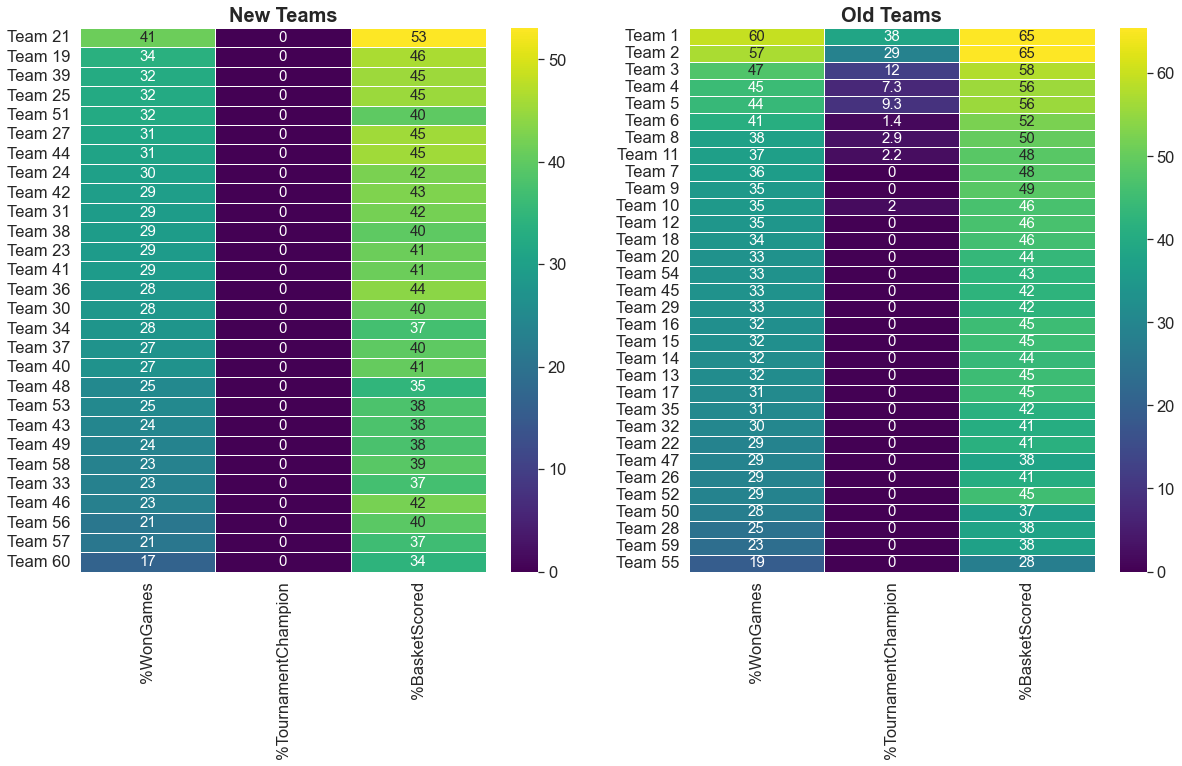

In [74]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.heatmap(data=youngTeams[['%WonGames','%TournamentChampion','%BasketScored']], 
            yticklabels=youngTeams['Team'],annot=True, annot_kws={'size': 15},linewidths=.5,
            cmap = sns.color_palette("viridis", as_cmap=True), ax=ax[0]);
sns.heatmap(data=oldTeams[['%WonGames','%TournamentChampion','%BasketScored']], 
            yticklabels=oldTeams['Team'],annot=True, annot_kws={'size': 15}, linewidths=.5,
            cmap = sns.color_palette("viridis", as_cmap=True), ax=ax[1]);
#plt.tick_params(axis='both', which='major', labelsize=15)
ax[0].set_title("New Teams", fontsize=20, fontweight="bold");
ax[1].set_title("Old Teams", fontsize=20, fontweight="bold");

> **<span style='color:blue'>Observations</span>**
- In new age group, Team 21 is the best performing team based on %WonGames and %BasketScored, followed by Team 19
    - None of the young teams have won Tournament so far
- In Old age group, Team 1 is the best performing team based on %WonGames and %BasketScored, followed by Team 2

### Adding few more features to measure the performance of the teams 

In order to further assess the performance of teams, we can add few more features as follows,

- %Finalist = [ (#TournamentChampion + #Runner-Up) / #Tournament ] * 100
    > This feature suggests how many % times a team succeeded to enter the final match of the tournament. Hence higher value suggests that team has a better potential to defeat most other teams to win the championship title.
    
- GamesPerYear = ( #PlayedGames / Age )
    > As we saw in the correlation heatmap previously, teams who played high number of games have higher chances of winning Tournament championship. So this value will determine how many games a team play per year, and hence higher value will be suggest the rate at which team build its experience, especially it will help to identify new emerging teams with potential to play more games in the future and improve performance.
    
- BasketDifference = ( BasketScored - BasketGiven ) / ( BasketScored + BasketGiven )
    > If the team is scoring more baskets than giving the baskets to opponent, it is indicative of the higher chances of winning for the team.

In [75]:
# Creating new features as described above

basketBall['%Finalist'] = ((basketBall['TournamentChampion'] + basketBall['Runner-up'])/basketBall['Tournament'])*100
basketBall['%GamesPerYear'] = basketBall['PlayedGames'] / basketBall['Age']
basketBall['BasketDifference'] = (basketBall['BasketScored'] - basketBall['BasketGiven']) / (basketBall['BasketScored'] + basketBall['BasketGiven'])

#### Compare teams within age groups  based on newly added features

In [76]:
selectedFatures = ['Team', 'AgeGroup', '%WonGames', '%Finalist', '%TournamentChampion', '%GamesPerYear', 'BasketDifference']
newTeams = basketBall.loc[basketBall['AgeGroup'] == 'New', selectedFatures]
oldTeams = basketBall.loc[basketBall['AgeGroup'] == 'Old', selectedFatures]

# Sorting new teams by %GamesPerYear, as this determines the team experience, which might be proportional to success rate 
newTeams.sort_values(by=['%GamesPerYear'], ascending=False, inplace=True) 

# Sorting old teams by %WonGames, as this determines the rate of success
oldTeams.sort_values(by=['%WonGames'], ascending=False, inplace =True)

- For each of the newly created feature, let's find the top 5 teams, and then select best among them for each age group
- List of informative features selected for comparison
    - %WonGames
    - %Finalist
    - %TournamentChampion
    - %GamesPerYear
    - BasketDifference    

In [77]:
# Initialize sets for top teams for new and old age groups
topNewTeams = set()
topOldTeams = set()

In [78]:
# Function to find out top 5 teams based on given variable
def getTopTeamsForGivenFeature(teamsDf, col):
    return list(teamsDf[['Team', col]].sort_values(by = col, ascending=False)['Team'].head(5))

**Top 5 teams as per _%GamesPerYear_**

In [79]:
col = '%GamesPerYear'
newTeams_topGamesPerYear = getTopTeamsForGivenFeature(newTeams, col)
topNewTeams.update(newTeams_topGamesPerYear)
oldTeams_topGamesPerYear = getTopTeamsForGivenFeature(oldTeams, col)
topOldTeams.update(oldTeams_topGamesPerYear)

**Top 5 teams as per _BasketDifference_**

In [80]:
col = 'BasketDifference'
newTeams_topBasketDifference = getTopTeamsForGivenFeature(newTeams, col)
topNewTeams.update(newTeams_topBasketDifference)
oldTeams_topBasketDifference = getTopTeamsForGivenFeature(oldTeams, col)
topOldTeams.update(oldTeams_topBasketDifference)

**Top 5 teams as per _%Finalist_**

In [81]:
col = '%Finalist'
newTeams_topFinalist = getTopTeamsForGivenFeature(newTeams, col)
topNewTeams.update(newTeams_topFinalist)
oldTeams_topFinalist = getTopTeamsForGivenFeature(oldTeams, col)
topOldTeams.update(oldTeams_topFinalist)

**Top 5 teams as per _%WonGames_**

In [82]:
col = '%WonGames'
newTeams_topWonGames = getTopTeamsForGivenFeature(newTeams, col)
topNewTeams.update(newTeams_topWonGames)
oldTeams_topWonGames = getTopTeamsForGivenFeature(oldTeams, col)
topOldTeams.update(oldTeams_topWonGames)

In [83]:
topNewTeams

{'Team 19',
 'Team 21',
 'Team 23',
 'Team 25',
 'Team 27',
 'Team 37',
 'Team 39',
 'Team 44',
 'Team 51',
 'Team 53',
 'Team 58'}

In [84]:
topOldTeams

{'Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5', 'Team 7'}

In [85]:
# Subset data for only top teams based on selected features

topNewTeamsDf = newTeams.loc[newTeams['Team'].isin(topNewTeams),selectedFatures].sort_values(
    by=['%GamesPerYear'], ascending=[False])
topOldTeamsDf = oldTeams.loc[oldTeams['Team'].isin(topOldTeams),selectedFatures].sort_values(
    by=['%GamesPerYear'], ascending=[False])

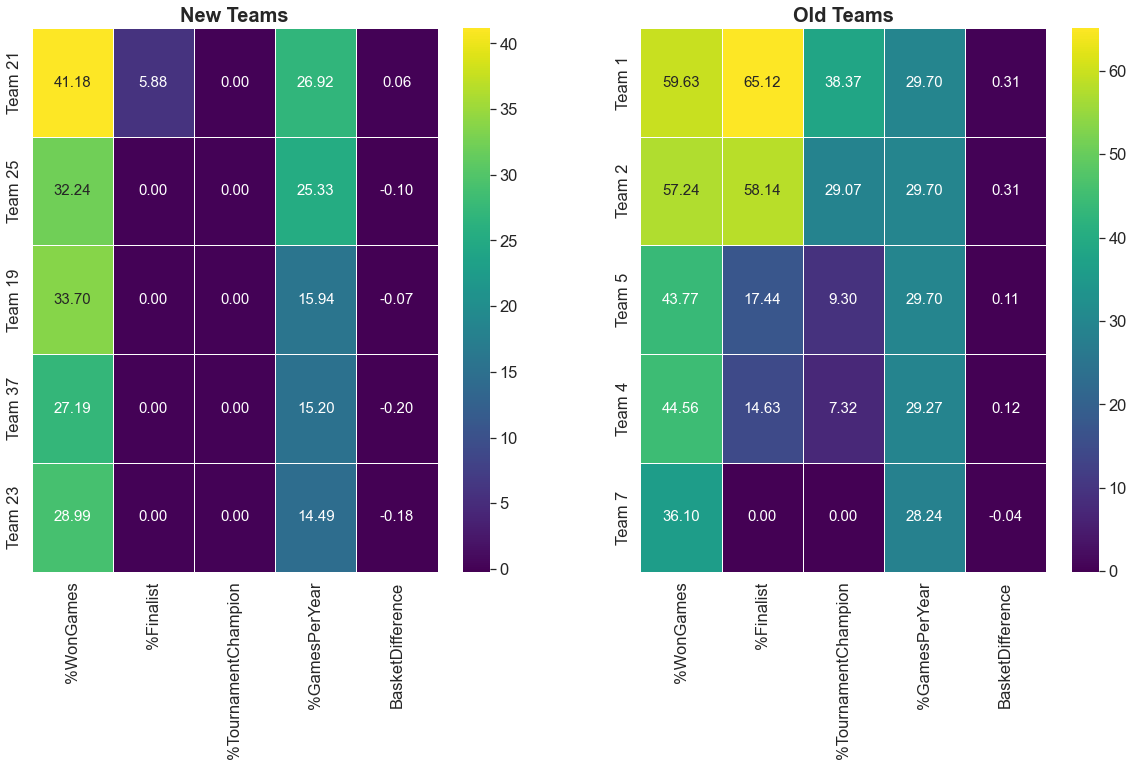

In [86]:
# List of numeric features to be used for heatmap from selected features for comparison

usecols = ['%WonGames', '%Finalist', '%TournamentChampion', '%GamesPerYear', 'BasketDifference']
fig, ax = plt.subplots(1,2, figsize=(20,10))

# Visualizing top 5 teams in each age group 

# For new teams
sns.heatmap(data=topNewTeamsDf[usecols].head(5), 
            yticklabels=topNewTeamsDf['Team'].head(5),annot=True, annot_kws={'size': 15},linewidths=.5,
            cmap = "viridis", fmt='.2f', ax=ax[0]);

# For old teams
sns.heatmap(data=topOldTeamsDf[usecols].head(5), 
            yticklabels=topOldTeamsDf['Team'].head(5),annot=True, annot_kws={'size': 15}, linewidths=.5,
            cmap = "viridis", fmt='.2f', ax=ax[1]);
#plt.tick_params(axis='both', which='major', labelsize=15)
ax[0].set_title("New Teams", fontsize=20, fontweight="bold");
ax[1].set_title("Old Teams", fontsize=20, fontweight="bold");

> **<span style='color:blue'>Comments from the heatmaps</span>**

Based on heatmaps of selected features
- For New teams
    - Apart from Team 21 reported earlier, we can see that Team 19 has higher %WonGames compared to Team 25 though it has played less %GamesPerYear.
    - Team 37 has played, more or less, equal number of games compared to Team 19 however the %WonGames is relatively lower.
    - Team 23 has played less number of games per year but performed better than Team 37 based on %WonGames

- Old teams
    - All the top 5 Old teams have played close to ~29% games per year
    - As observed previously, Team 1 and 2 have consistently been top performers
    - Among the rest, Team 4 and 5 have higher %WonGames and could reach in the finals
    - Team 7 has never been in the final and has least %WonGames
    

Comparing Old and New Teams which were never been finalist, Team 7 has higher %GamesPerYear, but its %WonGames is not drastically higher than new teams such as Team 25 and Team 19.

> **<span style='color:blue'>Conclusions</span>**

Based on above exploratory data analysis, 
`apart from Team 1 and Team 2`, which have been evidently the top performers, I would like to recommend company X to approach the following teams in the order of ranking,

1. Team 4
2. Team 5
3. Team 21
4. Team 19
5. Team 25
6. Team 23